This script is used for understanding the wave, tide, and other conditions of a site

In [16]:
import sys
import os
import numpy as np
from bs4 import BeautifulSoup
import netCDF4 as nc4
import datetime

sys.path.append(r'C:\Users\kelby\OneDrive\Desktop\MIT-WHOI\Code')
import helper_functions.data_tools as data_tools
import helper_functions.wave_conditions as wave_conditions

Setup the file path for the site data and visualize the folder structure if needed

In [17]:
# Set the folder location for the new site
site_folder = r"D:\Kelby_Kramer\sites"
# site_folder = r"C:\Users\kelby\OneDrive\Desktop\MIT-WHOI\sites"
# Set the name of the new site
# site_name = "duck"
site_name = "salinas_river"

# set the buoys for each site
if site_name == 'salinas_river':
    NDBC_buoy_id = '46042'
    CDIP_buoy_id = '156'
    WIS_buoy_id = 'ST83072'
    WIS_region = 'Pacific'
elif site_name == 'duck':
    NDBC_buoy_id = '44100'
    CDIP_buoy_id = '430'
    WIS_buoy_id = 'ST63219' # Duck south
    # WIS_buoy_id = 'ST63218' # Duck north
    WIS_region = 'Atlantic'

# Create the path for the site
site_path = os.path.join(site_folder, site_name)

# Retreive the available local data for site environmental conditions
site_contents = data_tools.create_folder_structure_dict(site_path)
print(site_contents)
# Show the folder structure
# data_tools.plot_folder_structure(site_contents, level=0)

NDBC = True
CDIP = True
WIS = True


{'ground_truth': {'profiles': {}, 'sonar': {}}, 'products': {}, 'satellite_imagery': {'radar': {'S1': {}}, 'visual': {'landsat': {}, 'planet': {}, 'S2': {}}}, 'site_conditions': {'buoy_data': {'CDIP': {'156': {'files': ['156p1_historic.nc']}}, 'NDBC': {'46042': {'files': ['46042h2010_stdmet.txt', '46042h2011_stdmet.txt', '46042h2012_stdmet.txt', '46042h2013_stdmet.txt', '46042h2014_stdmet.txt', '46042h2015_stdmet.txt', '46042h2016_stdmet.txt', '46042h2017_stdmet.txt', '46042h2018_stdmet.txt', '46042h2019_stdmet.txt', '46042h2020_stdmet.txt', '46042h2021_stdmet.txt', '46042h2022_stdmet.txt', '46042h2023_stdmet.txt', '46042stdmet.nc']}}, 'WIS': {'ST83072': {'files': ['ST83072.nc4']}}}, 'hindcast_data': {'WAVEWATCH_III': {}}, 'tide_data': {}}}


Load the data into the workbook

In [18]:
if NDBC:
    # Set the path to the NDBC buoy data
    org = 'NDBC'
    NDBC_nc_path = os.path.join(fr'D:\Kelby_Kramer\sites\{site_name}\site_conditions\buoy_data',org, NDBC_buoy_id,f'{NDBC_buoy_id}stdmet.nc')

    # Load the data
    NDBC_nc = nc4.Dataset(NDBC_nc_path, 'r')
    # Show the variables
    print('NDBC Variables:',NDBC_nc.variables.keys())
    #print the first and last time stamp
    NDBC_first_time = wave_conditions.getHumanTimestamp(NDBC_nc.variables['time'][0],"%Y-%m-%d")
    print(NDBC_first_time)
    NDBC_last_time = wave_conditions.getHumanTimestamp(NDBC_nc.variables['time'][-1],"%Y-%m-%d")
    print(NDBC_last_time)

    # Read in variables
    NDBC_ncTime = NDBC_nc.variables['time'][:]
    NDBC_timeall = [datetime.datetime.fromtimestamp(t) for t in NDBC_ncTime] # Convert ncTime variable to datetime stamps
    NDBC_Hs = NDBC_nc.variables['WVHT'][:]
    NDBC_Tp = NDBC_nc.variables['DPD'][:]
    # No wave direction in NDBC data, create a dummy variable
    NDBC_Dp = np.ones(len(NDBC_Hs))*99

if CDIP:
    # Set the path to the CDIP buoy data
    org = 'CDIP'
    CDIP_nc_path = os.path.join(fr'D:\Kelby_Kramer\sites\{site_name}\site_conditions\buoy_data',org, CDIP_buoy_id,f'{CDIP_buoy_id}p1_historic.nc')

    # Load the data
    CDIP_nc = nc4.Dataset(CDIP_nc_path, 'r')
    # Show the variables
    print('CDIP Variables:',CDIP_nc.variables.keys())
    #print the first and last time stamp
    CDIP_first_time = wave_conditions.getHumanTimestamp(CDIP_nc.variables['sstTime'][0],"%Y-%m-%d")
    print(CDIP_first_time)
    print(CDIP_nc.variables['sstTime'][0])
    CDIP_last_time = wave_conditions.getHumanTimestamp(CDIP_nc.variables['sstTime'][-1],"%Y-%m-%d")
    print(CDIP_last_time)

    # Read in variables
    CDIP_ncTime = CDIP_nc.variables['sstTime'][:]
    CDIP_timeall = [datetime.datetime.fromtimestamp(t) for t in CDIP_ncTime] # Convert ncTime variable to datetime stamps
    CDIP_Hs = CDIP_nc.variables['waveHs']
    CDIP_Tp = CDIP_nc.variables['waveTp']
    CDIP_Dp = CDIP_nc.variables['waveDp']

if WIS:  
    # Set the path to the WIS buoy data
    org = 'WIS'
    WIS_nc_path = os.path.join(fr'D:\Kelby_Kramer\sites\{site_name}\site_conditions\buoy_data',org, WIS_buoy_id,f'{WIS_buoy_id}.nc4')

    # Load the data
    WIS_nc = nc4.Dataset(WIS_nc_path, 'r')
    # Show the variables
    print('WIS Variables:',CDIP_nc.variables.keys())
    #print the first and last time stamp
    WIS_first_time = wave_conditions.getHumanTimestamp(WIS_nc.variables['time'][0],"%Y-%m-%d")
    print(WIS_first_time)
    WIS_last_time = wave_conditions.getHumanTimestamp(WIS_nc.variables['time'][-1],"%Y-%m-%d")
    print(WIS_last_time)

    # Read in variables
    WIS_ncTime = WIS_nc.variables['time'][:]
    WIS_timeall = [datetime.datetime.fromtimestamp(t) for t in WIS_ncTime] # Convert ncTime variable to datetime stamps
    WIS_Hs = WIS_nc.variables['waveHs'][:]
    WIS_Tp = WIS_nc.variables['waveTpPeak'][:]
    WIS_Dp = WIS_nc.variables['waveMeanDirection'][:]


NDBC Variables: dict_keys(['time', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'TIDE'])
2010-01-01
2023-11-25


CDIP Variables: dict_keys(['sourceFilename', 'waveTime', 'waveTimeBounds', 'waveFlagPrimary', 'waveFlagSecondary', 'waveHs', 'waveTp', 'waveTa', 'waveDp', 'wavePeakPSD', 'waveTz', 'waveSourceIndex', 'waveFrequency', 'waveFrequencyBounds', 'waveFrequencyFlagPrimary', 'waveFrequencyFlagSecondary', 'waveBandwidth', 'sstTime', 'sstTimeBounds', 'sstFlagPrimary', 'sstFlagSecondary', 'sstSeaSurfaceTemperature', 'sstSourceIndex', 'sstReferenceTemp', 'gpsTime', 'gpsTimeBounds', 'gpsStatusFlags', 'gpsLatitude', 'gpsLongitude', 'gpsSourceIndex', 'dwrTime', 'dwrTimeBounds', 'dwrSourceIndex', 'dwrBatteryLevel', 'dwrZAccelerometerOffset', 'dwrXAccelerometerOffset', 'dwrYAccelerometerOffset', 'dwrOrientation', 'dwrInclination', 'dwrBatteryWeeksOfLife', 'metaDeployLatitude', 'metaDeployLongitude', 'metaWaterDepth', 'metaDeclination', 'metaStationName', 'metaStationLatitude', 'metaStationLongitude', 'metaPlatform', 'metaInstrumentation', 'metaGridMapping', 'waveEnergyDensity', 'waveMeanDirection', 'wav

Compare the signifigant wave height history for each 

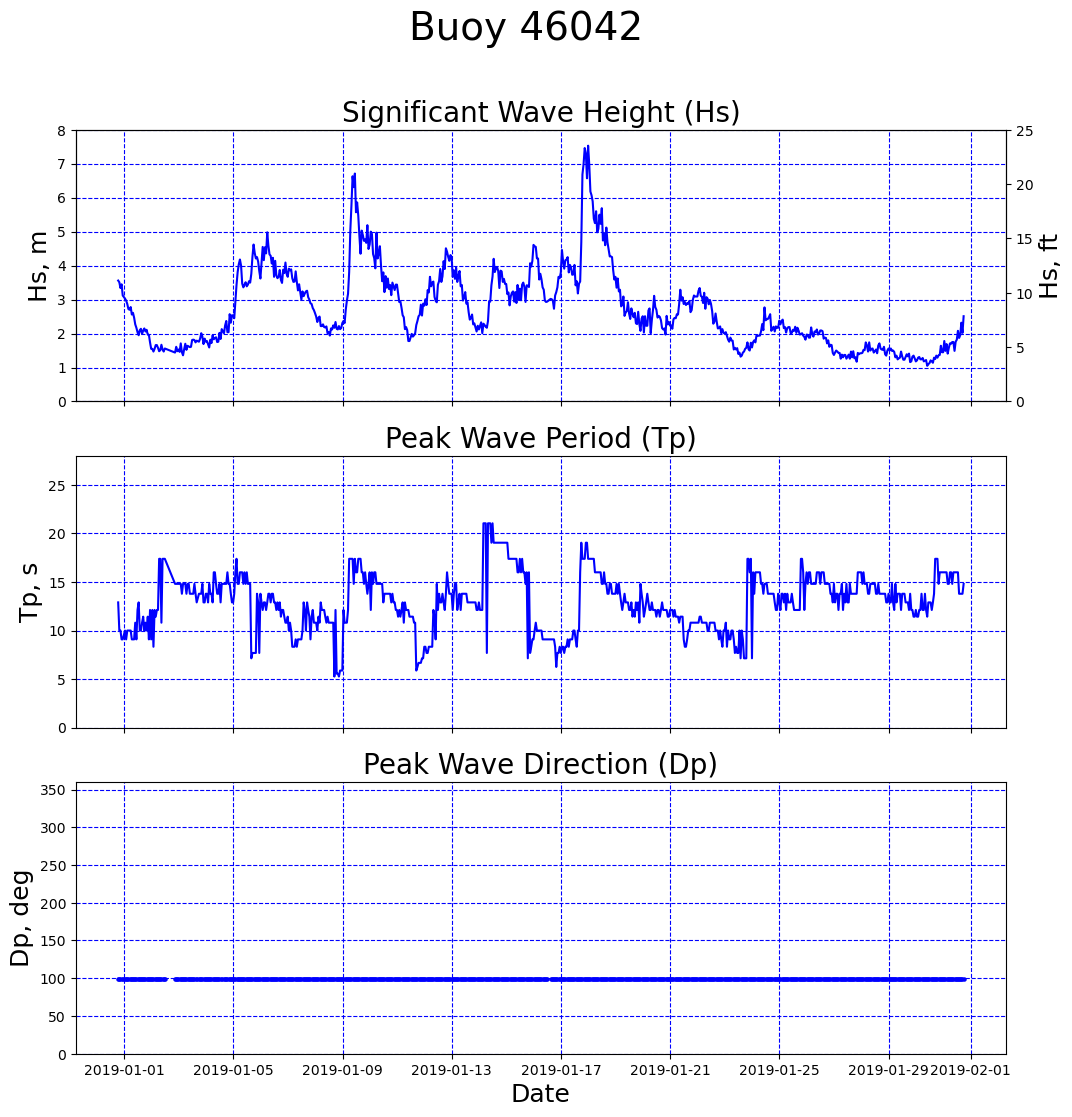

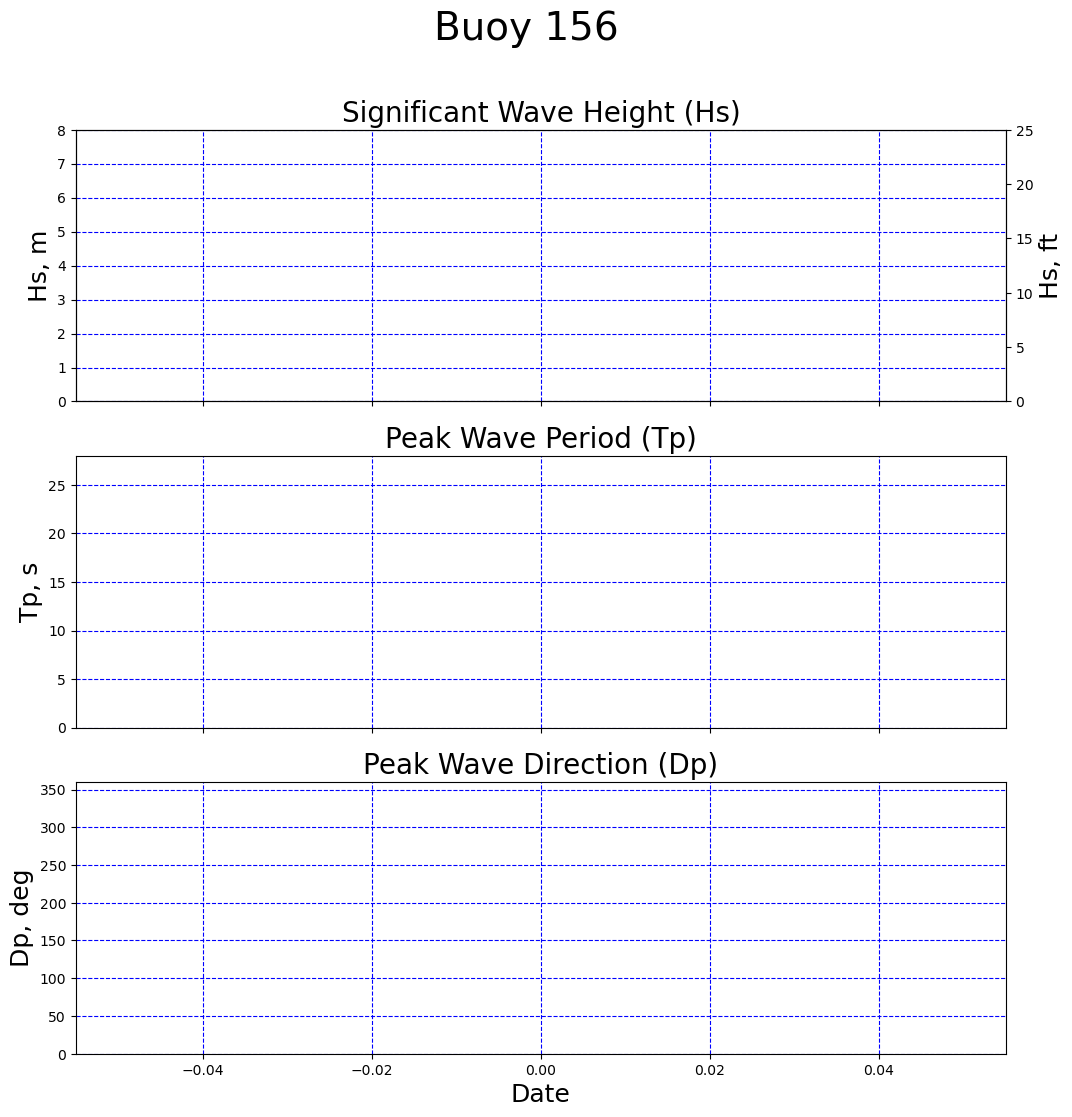

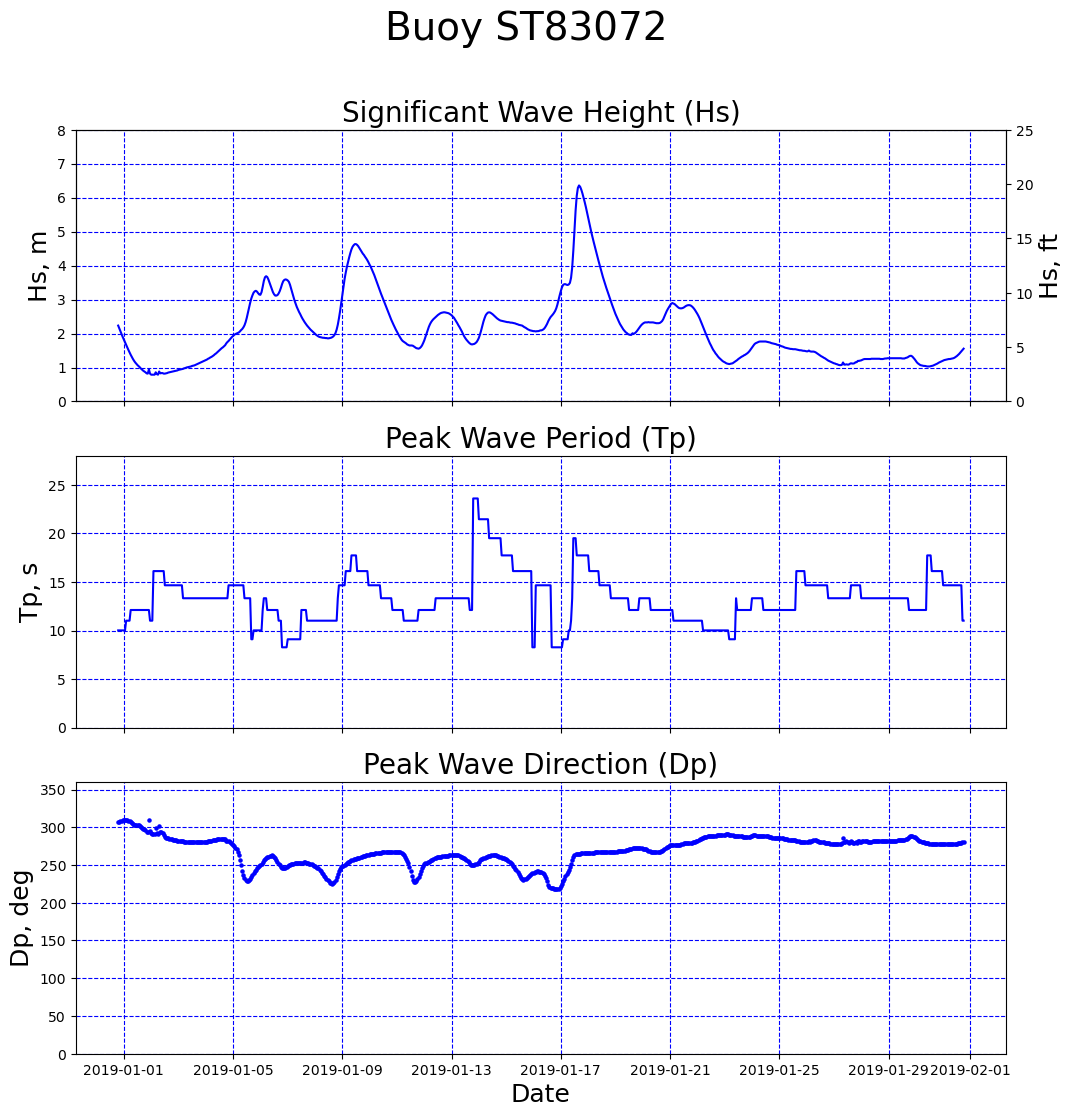

In [19]:
### Duck DOI
# Hurricane Irene 
# startdate = '2011-08-22'
# enddate = '2011-09-08'
# Huricane Hurricane Matthew
# startdate = '2016-08-01'
# enddate = '2016-11-13'
# Weird Anomoly at CDIP 430
# startdate = '2012-08-27'
# enddate = '2012-09-03'
# Looks like buoy data was redacted for 44100 when the anomoly occured @ 430 (the same buoy)
# startdate = '2012-01-01'
# enddate = '2012-12-31'
### Salinas River DOI
startdate = '2019-01-01'
enddate = '2019-02-01'
if NDBC:
    NDBC_wavehist_plt = wave_conditions.wave_history_plt(NDBC_ncTime, NDBC_timeall, NDBC_Hs, NDBC_Tp, NDBC_Dp, NDBC_buoy_id, startdate, enddate)
    NDBC_wavehist_plt.show()
if CDIP:
    CDIP_wavehist_plt = wave_conditions.wave_history_plt(CDIP_ncTime, CDIP_timeall, CDIP_Hs, CDIP_Tp, CDIP_Dp, CDIP_buoy_id, startdate, enddate)
    CDIP_wavehist_plt.show()
if WIS:
    WIS_wavehist_plt = wave_conditions.wave_history_plt(WIS_ncTime, WIS_timeall, WIS_Hs, WIS_Tp, WIS_Dp, WIS_buoy_id, startdate, enddate)
    WIS_wavehist_plt.show()
